In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#read the data
df = pd.read_csv("/Users\Dell\OneDrive\Documents\Quick Draw ML Internship\Machine Learning\data.csv")

In [3]:
df.tail()

,Hours of Study,Test Score
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [4]:
df.describe()

,Hours of Study,Test Score
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [5]:
df.columns

Index(['Hours of Study', 'Test Score'], dtype='object')

In [6]:
x = np.array(df['Hours of Study'])
y = np.array(df['Test Score'])

Text(0, 0.5, 'Test Score')

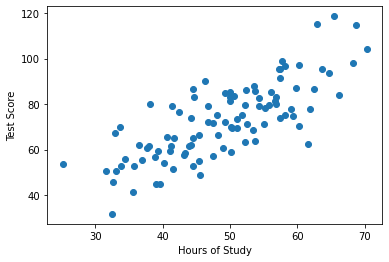

In [7]:
plt.scatter(x,y)
plt.xlabel("Hours of Study")
plt.ylabel("Test Score")

In [8]:
# hyper-parameters
alpha = 0.0001
iterations = 100
t0 = 0.2
t1 = 0.5

In [9]:
#hypothesis or prediciton function
def h(t0,t1):
    return t0+(t1*x)

In [10]:
#cost function
def get_cost(t0,t1):
    preds = h(t0,t1)
    J = (preds-y)**2
    J = J.mean()
    J = J/2
    return J

In [11]:
#testing the functions
def custom_plot(t0,t1):
    preds = h(t0,t1)
    plt.scatter(x,y)
    plt.plot(x,preds)
    plt.xlabel("Hours of Study")
    plt.ylabel("Test Score")
    plt.show()
    clear_output(wait=True)    

2089.0135054379653


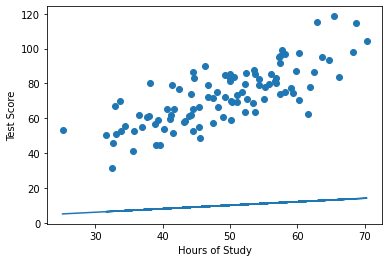

In [12]:
print(get_cost(0.1,0.2))
custom_plot(0.1,0.2)

In [13]:
#grdients
def get_gradients(t0,t1):
    #find predictions for all the samples and calculate the grdient
    preds = h(t0,t1)
    g0 = (preds-y).mean()
    g1 = ((preds-y)*x).mean() #each value multplies with other insied an array
    #g2 = p
#     ...
    return (g0,g1)

In [14]:
#update my parameters
#optimizer
def update(t0,t1):
    (g0,g1) = get_gradients(t0,t1)
    t0 = t0-alpha*(g0) #g0 means dowj/dow theta0
    t1 = t1-alpha*(g1)
    return (t0,t1)

In [15]:
#fit the model/optimize
def fit(t0,t1):
    cost_progress = []
    #training loop
    for i in range(iterations):
        t0,t1 = update(t0,t1)
        cost = get_cost(t0,t1)
        cost_progress.append(cost)
        custom_plot(t0,t1)
    return (t0,t1,cost_progress)

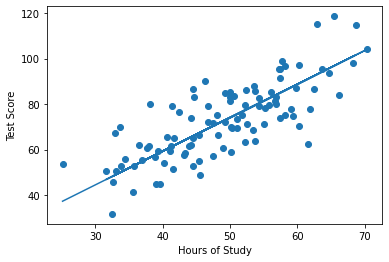

In [16]:
t0,t1,cost_progress = fit(t0,t1)

In [17]:
print(t0,t1)

0.2220994032066414 1.475126809291619


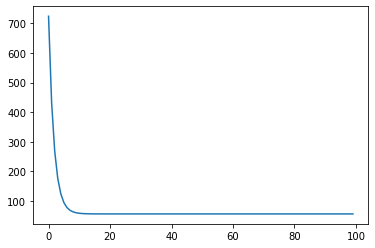

In [18]:
plt.plot(cost_progress)

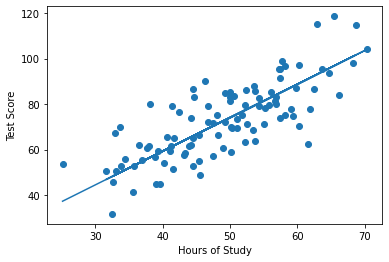

In [19]:
custom_plot(t0,t1)

In [20]:
def pred(t0,t1,x):
    return t0+t1*x

In [21]:
pred(t0,t1,40)

59.2271717748714